<a href="https://colab.research.google.com/github/Gdeepika-7/LGMVIP_DS/blob/main/stock_marketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
stock=pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


**Information about the Dataset**

In [ ]:
stock.shape
stock.info()
stock.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

**Checking for the null values**

In [ ]:
missing_value_count=stock.isnull().sum()
total_cells=np.product(stock.shape)
total_missing=missing_value_count.sum()
percentage_missing=(total_missing/total_cells)*100
print(percentage_missing)

0.0


In [ ]:
stock=stock[::-1]
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [ ]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


**Heatmap Generation**

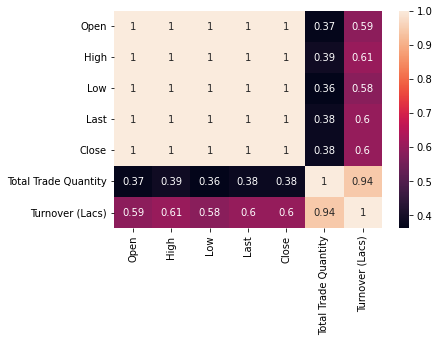

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(stock.corr(), annot=True)
plt.show()

In [ ]:
stock_high=stock.reset_index()['High']
stock_high

0       157.80
1       158.20
2       160.80
3       163.45
4       161.45
         ...  
1230    234.60
1231    237.50
1232    227.80
1233    218.60
1234    222.25
Name: High, Length: 1235, dtype: float64

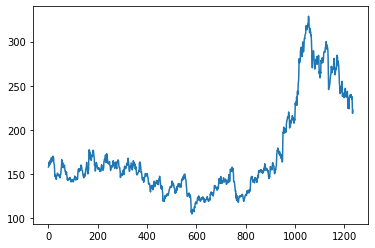

In [ ]:
plt.plot(stock_high)
plt.show()

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
stock_high=scaler.fit_transform(stock_high.values.reshape(-1,1))
stock_high

array([[0.23734107],
       [0.23912559],
       [0.25072496],
       ...,
       [0.54963194],
       [0.508588  ],
       [0.52487174]])

**Splitting the Training and Testing Data**

In [ ]:
train_size=int(len(stock_high)*0.8)
test_size=len(stock_high)-train_size
train_size,test_size

(988, 247)

In [ ]:
train_data,test_data=stock_high[:train_size],stock_high[train_size::1]
train_data.shape

(988, 1)

In [ ]:
# Here time step=100 indicates that we are looking at previous 100 values for predicting 101th value
def create_data(data,time_step):
  X_data,Y_data=[],[]
  for i in range(len(data)-time_step-1):
    X_data.append(data[i:i+time_step,0])
    Y_data.append(data[i+time_step,0])
  return np.array(X_data),np.array(Y_data)



In [ ]:
time_step=100
X_train,Y_train=create_data(train_data,time_step)
X_test,Y_test=create_data(test_data,time_step)

In [ ]:
# Make the data in to 3D data because, it is an LSTM requirement
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,Y_train.shape

((887, 100, 1), (887,))

**LSTM Model Creation**

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50, return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test),epochs=100,batch_size=64,verbose=True)

Epoch 1/100
14/14 [==============================] - 16s 576ms/step - loss: 0.0129 - val_loss: 0.0940
Epoch 2/100
14/14 [==============================] - 10s 699ms/step - loss: 0.0031 - val_loss: 0.0148
Epoch 3/100
14/14 [==============================] - 6s 410ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 4/100
14/14 [==============================] - 7s 512ms/step - loss: 0.0011 - val_loss: 0.0228
Epoch 5/100
14/14 [==============================] - 6s 455ms/step - loss: 0.0010 - val_loss: 0.0129
Epoch 6/100
14/14 [==============================] - 7s 509ms/step - loss: 9.8712e-04 - val_loss: 0.0180
Epoch 7/100
14/14 [==============================] - 6s 408ms/step - loss: 9.9628e-04 - val_loss: 0.0092
Epoch 8/100
14/14 [==============================] - 7s 515ms/step - loss: 9.1989e-04 - val_loss: 0.0067
Epoch 9/100
14/14 [==============================] - 6s 408ms/step - loss: 9.0290e-04 - val_loss: 0.0100
Epoch 10/100
14/14 [==============================] - 7s 511ms/step - los

**Model Prediction**

In [ ]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
train_error=sqrt(mean_squared_error(Y_train,train_prediction))
test_error=sqrt(mean_squared_error(Y_test,test_prediction))
train_error, test_error

(0.01220696420456059, 0.02582856227414471)

In [ ]:
train_prediction=scaler.inverse_transform(train_prediction)
test_prediction=scaler.inverse_transform(test_prediction)

In [ ]:
steps_back=100
train_predictplot=np.empty_like(stock_high)
train_predictplot[:,:]=np.nan
train_predictplot[steps_back:len(train_prediction)+steps_back,:]=train_prediction


test_predictplot=np.empty_like(stock_high)
test_predictplot[:,:]=np.nan
test_predictplot[len(train_prediction)+(steps_back *2)+1 :len(stock_high)-1, :]=test_prediction

**Data Visualization**

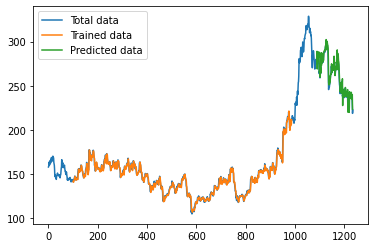

In [ ]:
plt.plot(scaler.inverse_transform(stock_high))
plt.plot(train_predictplot)
plt.plot(test_predictplot)

plt.legend(labels =['Total data','Trained data','Predicted data'])
plt.show()